![](https://i.imgur.com/0AUxkXt.png)

# Lecture 2 - Data Visualization

Introduction to Pandas and Seaborn

## Import libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import data and get an overview

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Titanic-Cobh-Harbour-1912.JPG/330px-Titanic-Cobh-Harbour-1912.JPG)

The dataset that we are working on is a list of passenger on the famous ship Titanic. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing a lot passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

**Data dictionary**
 
| Variable | Definition | Key |
|:--:|:--:|:--:|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class, a proxy for socio-economic status (SES) | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Gender | |
| Age | Age in years | |
| sibsp | # of siblings(brother,sister)/spouses(husband, wife) aboard the Titanic |
| parch | # of parents/children aboard the Titanic. Some children travelled only with a nanny, therefore parch=0 for them |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C=Cherbourg, Q=Queenstown, S=Southampton |

In [0]:
titanic = pd.read_csv('https://raw.githubusercontent.com/khoi/machine-learning-notebooks/master/titanic/data.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
471,472,0,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Basic Pandas and Seaborn

### Pandas

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

[Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)

Series is a one-dimensional labeled array capable of holding any data type

[Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)

In [11]:
type(titanic)

pandas.core.frame.DataFrame

In [0]:
type(titanic['Name'])

pandas.core.series.Series

In [20]:
titanic[['Name', 'Age', 'SibSp']]

,Name,Age,SibSp
0,"Braund, Mr. Owen Harris",22.0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,"Heikkinen, Miss. Laina",26.0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
4,"Allen, Mr. William Henry",35.0,0
5,"Moran, Mr. James",NaN,0
6,"McCarthy, Mr. Timothy J",54.0,0
7,"Palsson, Master. Gosta Leonard",2.0,3
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1


In [27]:
titanic.loc[:4, ['Name', 'Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0


In [0]:
titanic[['Name', 'Survived']]

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
5,"Moran, Mr. James",0
6,"McCarthy, Mr. Timothy J",0
7,"Palsson, Master. Gosta Leonard",0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1
9,"Nasser, Mrs. Nicholas (Adele Achem)",1


In [28]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**How to get data of a column?**

In [29]:
# titanic['Name'][:5]
titanic['Name'][-5:]

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
890                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [33]:
titanic.loc[:5, "Name"]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
Name: Name, dtype: object

**Aggregation**

In [35]:
titanic['Age'].min()
titanic['Age'].mean()
titanic['Age'].max()
titanic['Fare'].sum()

28693.9493

**Filtering data**

In [42]:
# titanic[titanic['Sex']=='male']
# titanic[titanic['Sex']=='male']
# titanic.shape[1]

titanic[(titanic['Sex'] == 'male') & (titanic['Age'] < 15)]

7                       Palsson, Master. Gosta Leonard
16                                Rice, Master. Eugene
50                          Panula, Master. Juha Niilo
59                  Goodwin, Master. William Frederick
63                               Skoog, Master. Harald
78                       Caldwell, Master. Alden Gates
125                       Nicola-Yarred, Master. Elias
164                       Panula, Master. Eino Viljami
165    Goldsmith, Master. Frank John William "Frankie"
171                               Rice, Master. Arthur
182              Asplund, Master. Clarence Gustaf Hugo
183                          Becker, Master. Richard F
193                         Navratil, Master. Michel M
261                  Asplund, Master. Edvin Rojj Felix
278                                 Rice, Master. Eric
305                     Allison, Master. Hudson Trevor
340                     Navratil, Master. Edmond Roger
348             Coutts, Master. William Loch "William"
386       

**Categorical Variables**

In [0]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [43]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
titanic['Pclass'].unique()

array([3, 1, 2])

In [0]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
man_die = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 0)]


In [69]:
titanic[titanic["Age"] == 17]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C


### Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

[Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)

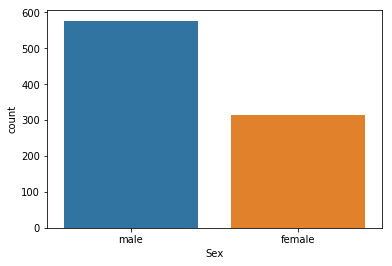

In [0]:
sns.countplot(x='Sex', data=titanic)

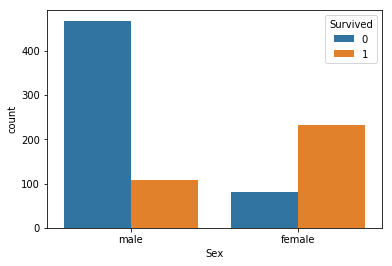

In [0]:
sns.countplot(x='Sex', hue='Survived', data=titanic)

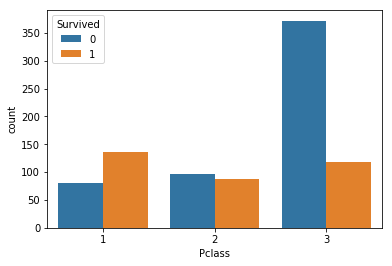

In [71]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)

**Distribution**

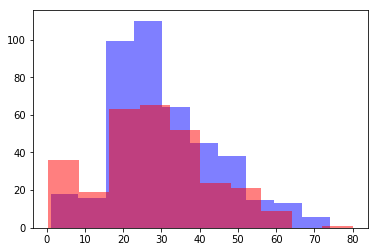

In [0]:
plt.hist(x='Age', data=titanic[titanic['Survived']==0], color='blue', alpha=0.5)
plt.hist(x='Age', data=titanic[titanic['Survived']==1], color='red', alpha=0.5)
plt.show()

**Correlation Matrix**

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


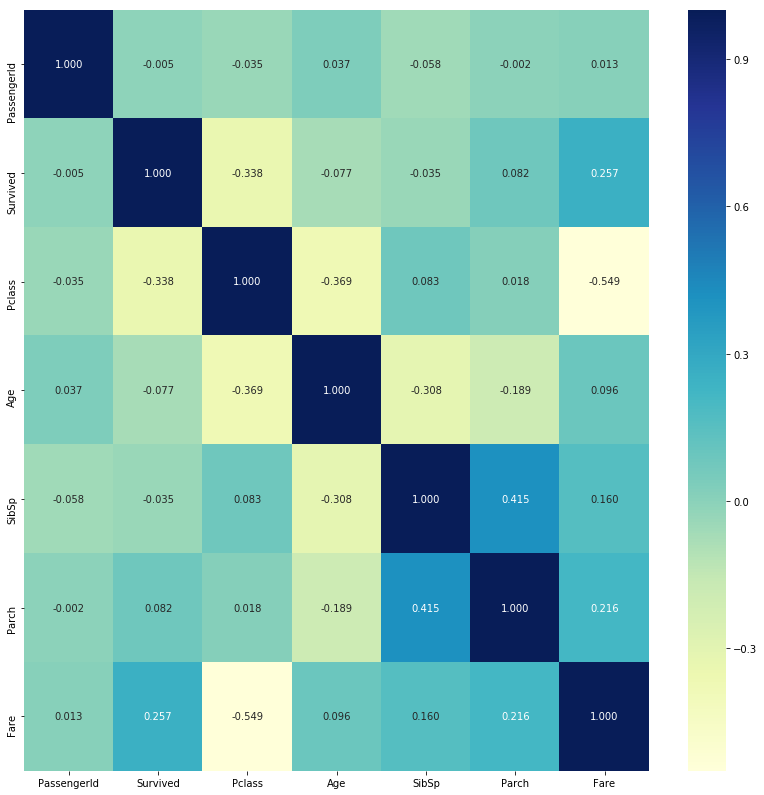

In [72]:
plt.figure(figsize=(14,14))
sns.heatmap(titanic.corr(), annot=True, fmt='.3f', cmap='YlGnBu')
titanic.corr()

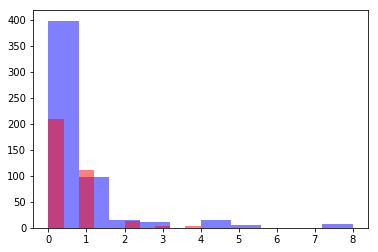

In [73]:
plt.hist(x='SibSp', data=titanic[titanic['Survived']==0], color='blue', alpha=0.5)
plt.hist(x='SibSp', data=titanic[titanic['Survived']==1], color='red', alpha=0.5)
plt.show()

**Had people who came alone more chance to live or people who came with family?**

In [0]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone']  = 1
titanic['IsAlone'][titanic['FamilySize'] > 1] = 0
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.000,NaN,S,1,1
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.925,NaN,S,1,1
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.100,D30,S,2,0
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.500,NaN,S,1,1
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.525,NaN,C,1,1


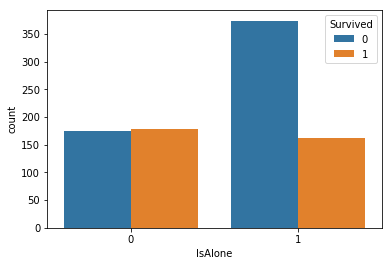

In [0]:
sns.countplot(x='IsAlone', hue='Survived', data=titanic)

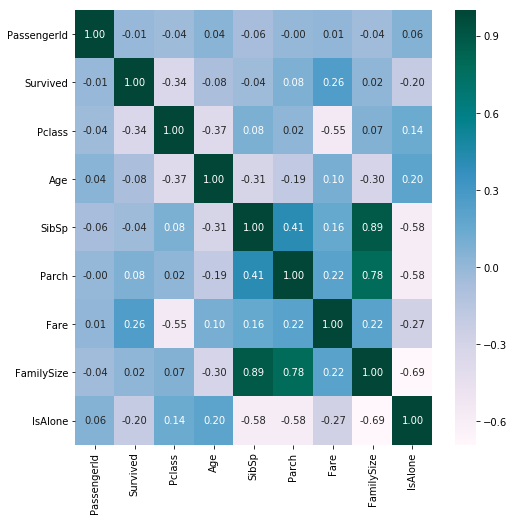

In [0]:
plt.figure(figsize=(8,8))
sns.heatmap(titanic.corr(), annot=True, fmt='.2f', cmap='PuBuGn')

In [0]:
titanic[titanic['Name'] == 'Jack']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone


In [0]:
titanic[titanic['Name'].str.lower().str.contains('jack')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,1,1


In [0]:
titanic[titanic['Name'].str.lower().str.contains('rose')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.50,NaN,S,1,1
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S,2,0


In [74]:
titanic[titanic['Age'] == titanic['Age'].min()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [75]:
titanic[(titanic['Embarked']=='C') & (titanic['Pclass']==3) & (titanic['Survived']==1) & (titanic['Age']>16)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C
762,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,NaN,C
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


### Reflection

I think our analysis works, evidenced by the famous movie. Jack was PClass 3, Male, and over 10. 

![alt text](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/titanic-jack-1485877267.gif?crop=1xw:1xh;center,top&resize=480:*)

Rose was female, PClass 1. She had a good chance to survive. 

We could have skipped watching the movie and predicted the outcome from the beginning.